# Метод k ближайших соседей (k-NN, k Nearest Neighbors) 

План:
- классификация и регрессия
- практические вопросы: к, расстояние, связь, ошибки в данных
- оптимальность и допущения

## 1. Классификация

- самый простой алгоритм ML
- построение модели заключается в запоминании обучающего набора данных
- прогноз для новой точки данных делается по ближайшим к ней "соседям" из обучающего набора

In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

### Пример 1

Дано: два класса (синие и красные объекты). К какому классу отнести новый объект?

In [41]:
x, y = make_blobs(n_samples=20, n_features=2, centers=2,
                  cluster_std=1, random_state=17)

In [42]:
print(f'features: {x[0,0]:.2f} {x[0,1]:.2f}   class: {y[0]}') # blue
print(f'features: {x[1,0]:.2f} {x[1,1]:.2f}   class: {y[1]}') # red

features: -3.57 -1.16   class: 0
features: -5.20 -7.77   class: 1


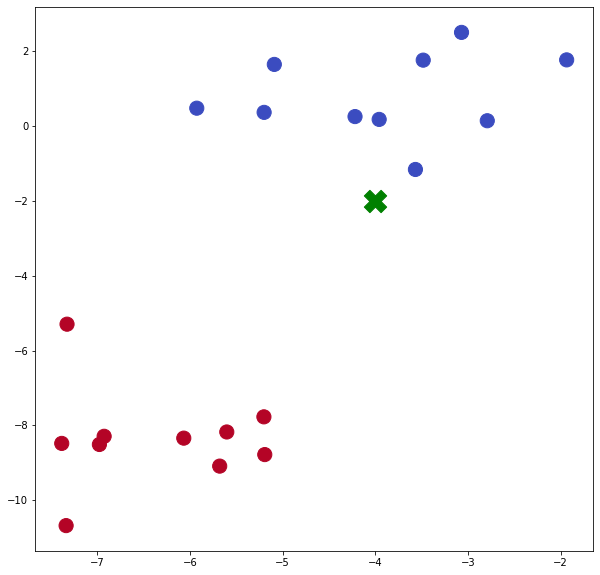

In [43]:
cmap = plt.cm.coolwarm

plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], s = 200, c = y, cmap=cmap)
plt.scatter(-4, -2, s = 500, c='g', marker='X');

Какой объект из обучающей выборки находится наиболее близко к новому? Присваиваем его метку класса новому объекту.

### Пример 2

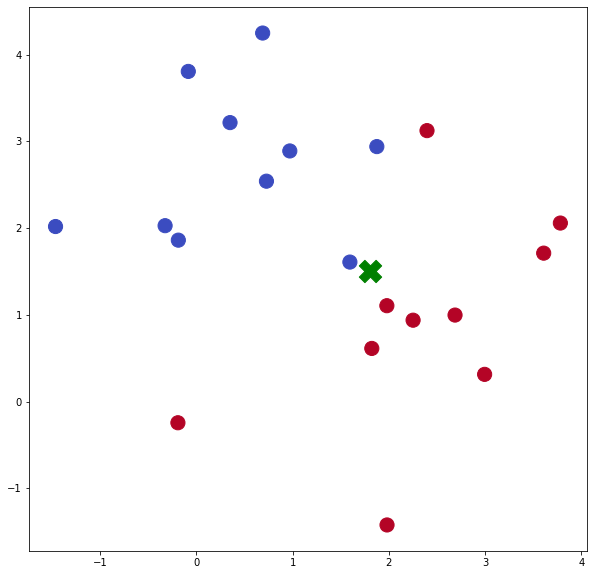

In [44]:
x, y = make_blobs(n_samples=20, n_features=2, centers=2,
                  cluster_std=1, random_state=9, center_box=(0,5))

plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], s= 200, c = y, cmap=cmap)
plt.scatter(1.8, 1.5, s=500, c='g', marker='X');

Построим классификатор. 

Так как алгоритм ищет ближайшее расстояние до некоторого объекта из обучающей выборки, все пространство будет разбито на области. Эти области будут контролироваться объектами обучающей выборки, находящимися внутри них. 

Плоскость разделяющая классы объектов будет представлять собой ломанную прямую.

In [47]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [54]:
Z

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

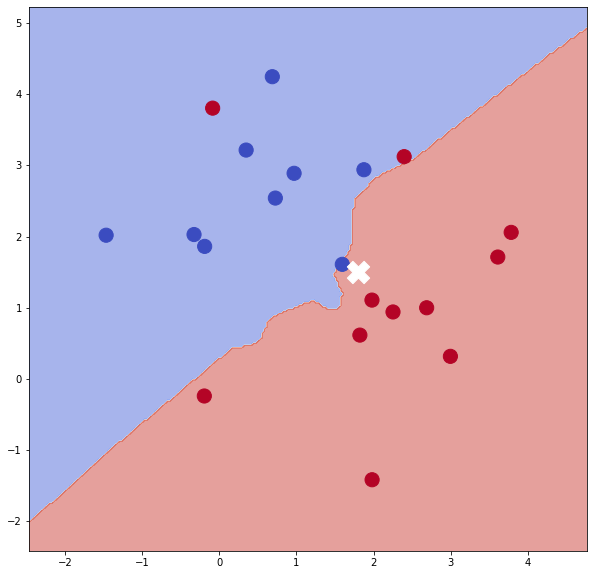

In [88]:
h = .03
x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(1.8, 1.5, s=500, c='white', marker='X');

### Выбросы (outliers)
- Алгоритм очень чувствителен к ошибкам в данных. 
- Каждая ошибка в даннных значительно изменяет границу, что очень плохо сказывается на предсказательной способности алгоритма.
- Алгоритм сильно переобучен

Как уменьшить "переобучение":
- использовать более одного ближайшего соседа. Принимать решение, например, по трем ближайшим соседям. 
- с увеличением числа соседей алгоритм будет становиться более стабильным и иметь более гладкие границы.

In [97]:
x0, x1 = 1.8, 1.5

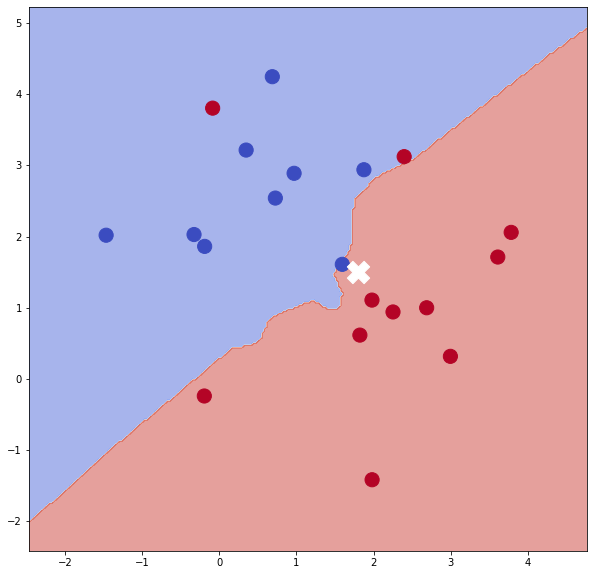

In [98]:
y[-8] = 1
clf.fit(x,y)

Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(x0, x1, s=500, c='white', marker='X');

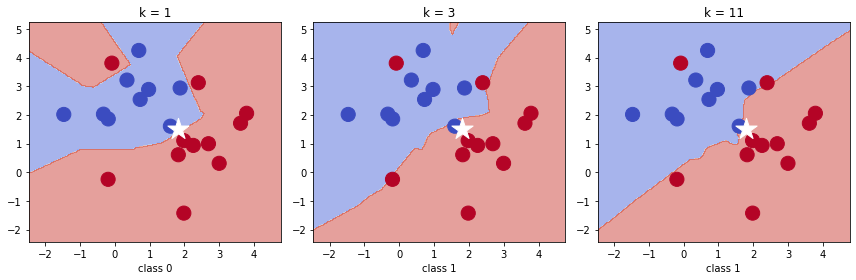

In [108]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,  cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(x0, x1, s=500, c='white', marker='*')
c = clf.predict([[x0, x1]])
plt.title('k = 1')
plt.xlabel(f'class {c[0]}')

plt.subplot(132)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,  cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(x0, x1, s=500, c='white', marker='*')
c = clf.predict([[x0, x1]])
plt.title('k = 3')
plt.xlabel(f'class {c[0]}')

plt.subplot(133)
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,  cmap=cmap, alpha=.5)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(x0, x1, s=500, c='white', marker='*')
c = clf.predict([[x0, x1]])
plt.title('k = 11')
plt.xlabel(f'class {c[0]}')
plt.tight_layout();



### Пример 3

In [109]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()

In [175]:
x = digits['data']
y = digits['target']
img = digits['images']

In [176]:
type(x)

numpy.ndarray

#### Представление данных:

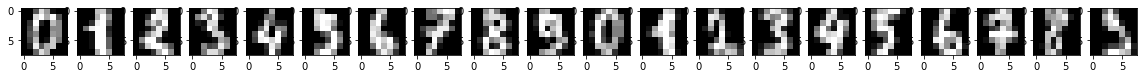

In [114]:
plt.figure(figsize=(20,10))
for it in range(20):
    plt.subplot(1, 20, it+1)
    plt.imshow(img[it], cmap=plt.cm.gray)
    

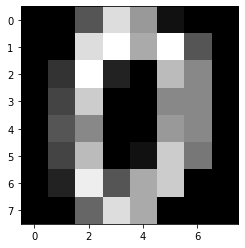

In [121]:
plt.imshow(img[0], cmap=plt.cm.gray);

In [123]:
img[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [122]:
img[0].min(), img[0].max()

(0.0, 15.0)

Битовая глубина 4 ($2^4 = 16$ цветов)
<img src="Gradient-Bit-Depth.jpg">

#### Распределение классов датасета:

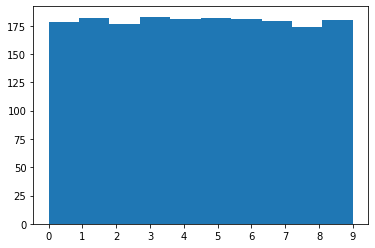

In [135]:
plt.hist(y, bins=10)
plt.xticks(range(0, 10));

#### Разбиение исходных данных на обучающую и контрольную выборки:

In [136]:
x_train, x_test, y_train, y_test, img_train, img_test = train_test_split(x, y, img, 
                                                                         test_size = 0.5, 
                                                                         random_state=17)

#### Распределение классов обучающей выборки:

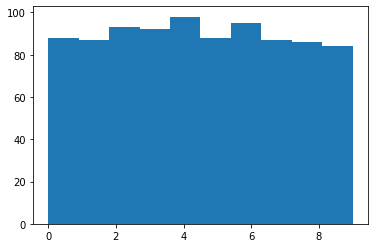

In [137]:
plt.hist(y_train);

###  Eвклидово расстояние (Euclidean distance)

Для точек ${\displaystyle p=(p_{1},\dots ,p_{n})}$ и ${\displaystyle q=(q_{1},\dots ,q_{n})} $ евклидово расстояние определяется следующим образом: ${\displaystyle d(p,q)={\sqrt {(p_{1}-q_{1})^{2}+(p_{2}-q_{2})^{2}+\dots +(p_{n}-q_{n})^{2}}}={\sqrt {\sum _{k=1}^{n}(p_{k}-q_{k})^{2}}}}$

In [230]:
import numpy as np

#### Расстояние Евклида для изображений из одного класса:

In [232]:
np.sqrt(np.sum((img[6] - img[6 + 10]) ** 2))

33.80828300875393

#### Расстояние Евклида для изображений из разных классов:

In [235]:
np.sqrt(np.sum((img[6] - img[9]) ** 2))

52.316345438113316

In [236]:
distances = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        distances[i, j] = np.sqrt(np.sum((img[i] - img[j]) ** 2))

In [238]:
import seaborn as sns

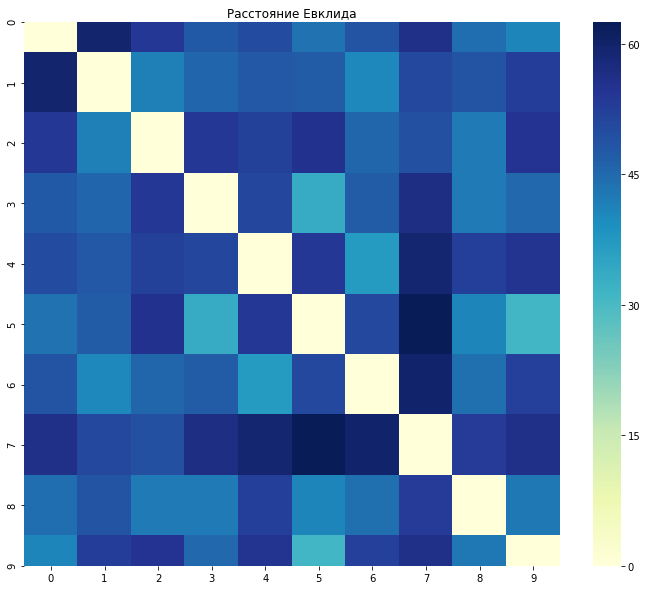

In [246]:
plt.figure(figsize=(12,10))
sns.heatmap(distances, cmap="YlGnBu").set_title('Расстояние Евклида');

- Расстояние Евклида "сам с собой" равно 0 (расстояния идентичны)
- Чем меньше расстояние, тем более похожи изображения, тем они ближе в пространстве
- Самые непохожие между собой (далёкие) цифры - 5 и 7
- Самые похожие (разные) цифры - 5 и 9

In [250]:
np.unravel_index(np.argmax(distances, axis=None), distances.shape)

(5, 7)

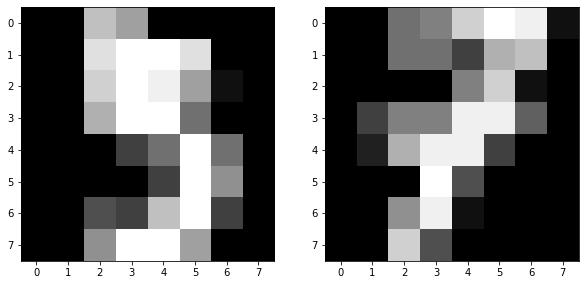

In [256]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img[5], cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(img[7], cmap=plt.cm.gray);

In [252]:
distances[distances == 0] = 100
np.unravel_index(np.argmin(distances, axis=None), distances.shape)

(5, 9)

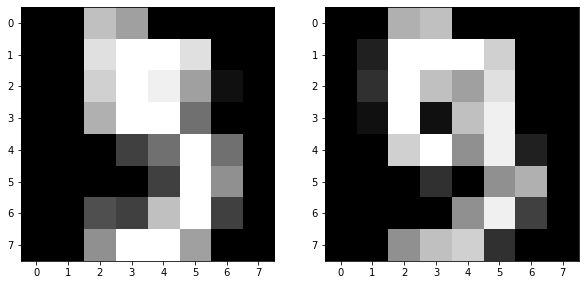

In [258]:
num = 6
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img[5], cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(img[9], cmap=plt.cm.gray);

## KNeighborsClassifier

Power parameter for the Minkowski metric. 
When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

In [262]:
clf = KNeighborsClassifier(n_neighbors=7, weights ='distance', p=2)
clf.fit(x_train, y_train)
print(f'Mean accuracy (train): {clf.score(x_train, y_train):.2f}') # алгоритм запомнил данные
print(f'Mean accuracy (test) : {clf.score(x_test, y_test):.2f}')

Mean accuracy (train): 1.00
Mean accuracy (test) : 0.97


### Ближайшие соседи:

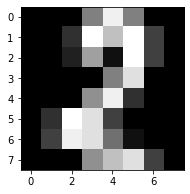

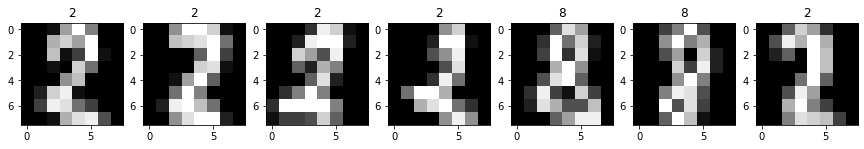

In [267]:
ind = 1
dist, nums = clf.kneighbors(x_test[ind].reshape(1, -1), n_neighbors=7)

plt.figure(figsize=(3,3))
plt.imshow(img_test[ind], cmap=plt.cm.gray)

plt.figure(figsize=(15,10))
for it, num in enumerate(nums[0]):
    plt.subplot(1, len(nums[0]), it+1)
    plt.imshow(img_train[num], cmap=plt.cm.gray)
    plt.title(y_train[nums[0, it]])

5 соседей из 7 - двойки, 2 соседа восьмёрки

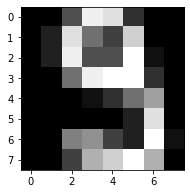

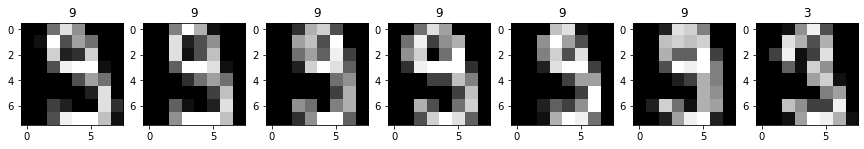

In [268]:
ind = 7
dist, nums = clf.kneighbors(x_test[ind].reshape(1, -1), n_neighbors=7)
plt.figure(figsize=(3,3))
plt.imshow(img_test[ind], cmap=plt.cm.gray)
plt.figure(figsize=(15,10))
for it, num in enumerate(nums[0]):
    plt.subplot(1, len(nums[0]), it+1)
    plt.imshow(img_train[num], cmap=plt.cm.gray)
    plt.title(y_train[nums[0, it]])
#print(y_train[nums[0]])

### Выбор количества соседей

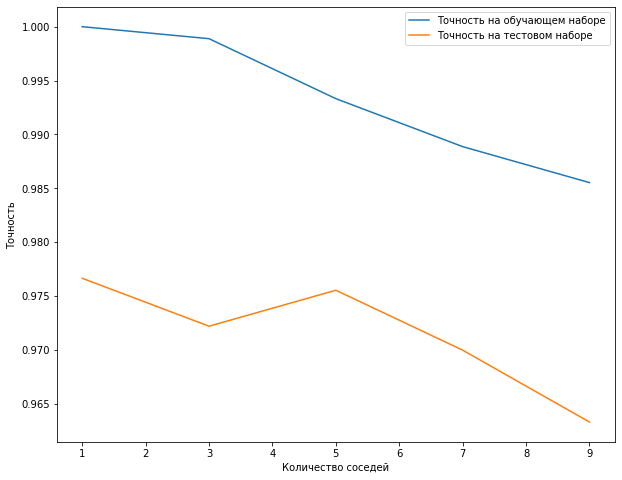

In [277]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11, 2)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)

    training_accuracy.append(clf.score(x_train, y_train))
    test_accuracy.append(clf.score(x_test, y_test))
    

plt.figure(figsize=(10,8))
plt.plot(neighbors_settings, training_accuracy, label="Точность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="Точность на тестовом наборе")
plt.ylabel("Точность")
plt.xlabel("Количество соседей")
plt.legend();

- Точность для 1 соседа на обучающем наборе = 1 (запоминание данных)
- Наибольшая точность (для данного набора данных) достигается при 1 или 5 соседях

## 2. Регрессия

- Рассчитывается расстояние между объектами
- Выбирается k ближайших объектов
- Ответ - среднее значение

$\hat{y} = f(x) = \frac{1}{k}\sum \limits_{j=1}^{k} y_j$

In [377]:
np.random.seed(42)
x_real = np.linspace(0, 7, 100)
y_real = 6 * np.sin(x_real) + 2 * x_real

x_train = np.array([0.5, 1.1, 2.4, 3.4, 4.7, 5.2, 6.5])
y_train = 6 * np.sin(x) + 2 * x_train + np.random.normal(scale=1)

x_test = np.array([0.7, 2, 2.7, 4, 5, 6.1])
y_test = 6 * np.sin(x_test) + 2 * x_test + np.random.normal(scale=1)

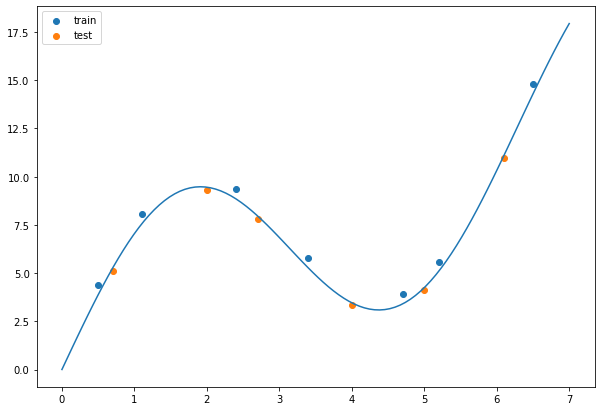

In [379]:
plt.figure(figsize=(10,7))

plt.plot(x_real, y_real)


plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='test')
plt.legend();


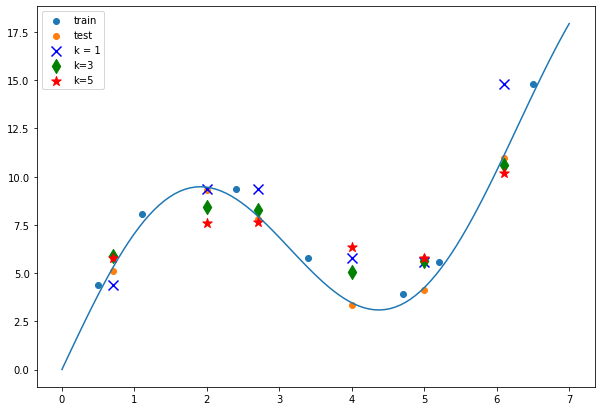

In [385]:
plt.figure(figsize=(10,7))

plt.plot(x_real, y_real)


plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='test')


clf = KNeighborsRegressor(n_neighbors=1, weights='distance')
clf.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

#x_pred = np.array([4], dtype=float)
plt.scatter(x_test, clf.predict(x_test.reshape(-1, 1)), s = 100, marker='x', c='b', label='k = 1')

clf.n_neighbors = 3
plt.scatter(x_test, clf.predict(x_test.reshape(-1, 1)), s = 100, marker='d', c='g', label='k=3')

clf.n_neighbors = 5
plt.scatter(x_test, clf.predict(x_test.reshape(-1, 1)), s = 100, marker='*', c='r', label='k=5')

plt.legend();

- Если k = 1, то просто копируется ближайшее значение
- Если k = 5, то берется слишком много точек и график "усредняется", теряется амплитуда
- Необходимо использовать метрики, чтобы подобрать правильное значение параметра k

## Выбор числа соседей
Большее число соседей означает более вероятный класс для тестового значения

Меньшее число соседей означает неустойчивость в классифкации.

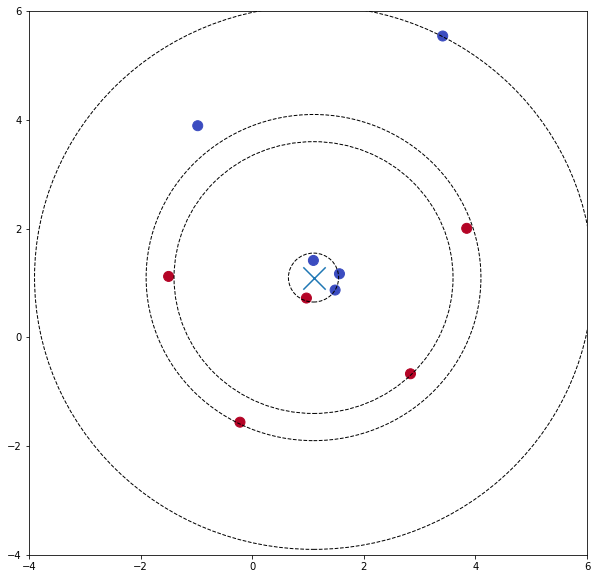

In [21]:
x, y = make_blobs(n_samples=10, n_features=2, center_box=(0,3), centers=2 ,cluster_std=2, random_state=3)
cmap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
ax = plt.gca()
# plt.figure(figsize=(10,10))
ax.set_xlim((-4, 6))
ax.set_ylim((-4, 6))
ax.scatter(x[:,0], x[:,1], s= 100, c = y, cmap=cmap)
ax.scatter(1.1, 1.1, s=500, marker='x')
ax.add_artist(plt.Circle((1.1, 1.1), radius=0.45, fill=False, ls='--'))
ax.add_artist(plt.Circle((1.1, 1.1), radius=2.5, fill=False, ls='--'))
ax.add_artist(plt.Circle((1.1, 1.1), radius=3, fill=False, ls='--'))
ax.add_artist(plt.Circle((1.1, 1.1), radius=5, fill=False, ls='--'))

## Расстояние между объектами
Ключевой компонент алгоритма, так как итоговые алгоритмы будет существенно отличаться при использовании различных метрик расстояний.

### Эвклидово расстояние (численные атрибуты)
Наиболее распрастраненной метрикой является Эвклидово расстояние. Функция симметричкая, сферическа, все признаки равные по своему вкладу.

Есть проблема - чувствительность к выбросам в отдельных атрибутах объекта.

$D(x,x') = \sqrt{\sum_d|x_d - x'_d|^2}$

### Расстояние Хемминга (категориальные атрибуты)

$D(x,x') = \sum_d 1_{x_d \neq x'_d}$

там где атрибуты не совпадают.

### Расстояние Минковского (p-norm)

$D(x,x') = \sqrt[p]{\sum_d|x_d - x'_d|^p}$

### Расстояние Кулюбака-Лейблера

$D(x,x') = -\sum_d x_d \log \frac{x_d}{x'_d}$

## Практические проблемы
- равное количество соседей с одинаковыми метками не позволяет точно провести классификацию.
- приходится использовать нечетное количество, но это может не сработать в мультиклассовой классификации.
- решение проблем:
    - взять класс для тестового случая наугад;
    - воспользоваться 1-nn;
    - давать класс по приоритету.

Отсутствующие атрибуты в данных необходимо заполнять, с пропущенными данными невозможно посчитать расстояние. 
Причем большое значение в одном атрибуте может серьезно повлиять на классификацию.
Лучше всего использовать среднее значение.

## Метод Парзеновского окна

Text(0.5, 1.0, 'Parzen window')

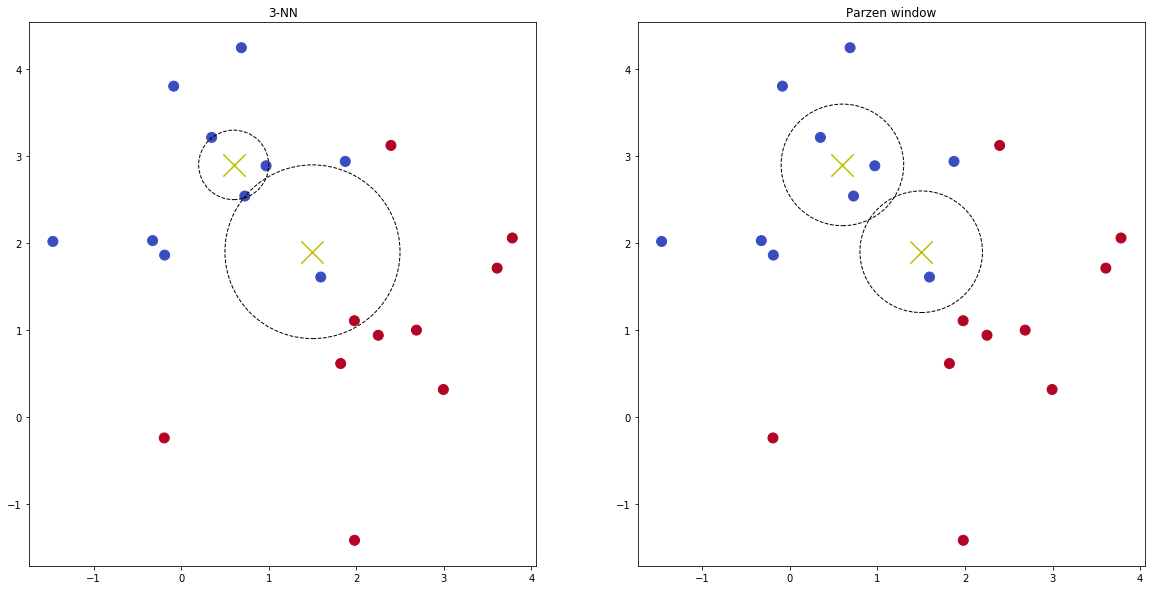

In [22]:
x, y = make_blobs(n_samples=20, n_features=2, centers=2 ,cluster_std=1, random_state=9, center_box=(0,5))
cmap = plt.cm.coolwarm
plt.figure(figsize=(20,10))
# plt.scatter(x[:,0], x[:,1], s= 200, c = y, cmap=cmap)
# plt.scatter(1.5, 1.9, s=500, c='g', marker='x')
plt.subplot(121)
ax = plt.gca()

# ax.set_xlim((-4, 6))
# ax.set_ylim((-4, 6))
ax.scatter(x[:,0], x[:,1], s= 100, c = y, cmap=cmap)
ax.scatter(1.5, 1.9, s=500, marker='x', c='y')
ax.scatter(0.6, 2.9, s=500, marker='x', c='y')
ax.add_artist(plt.Circle((1.5, 1.9), radius=1, fill=False, ls='--'))
ax.add_artist(plt.Circle((0.6, 2.9), radius=0.4, fill=False, ls='--'))
ax.set_title('3-NN')

plt.subplot(122)
ax = plt.gca()

# ax.set_xlim((-4, 6))
# ax.set_ylim((-4, 6))
ax.scatter(x[:,0], x[:,1], s= 100, c = y, cmap=cmap)
ax.scatter(1.5, 1.9, s=500, marker='x', c='y')
ax.scatter(0.6, 2.9, s=500, marker='x', c='y')
ax.add_artist(plt.Circle((1.5, 1.9), radius=0.7, fill=False, ls='--'))
ax.add_artist(plt.Circle((0.6, 2.9), radius=0.7, fill=False, ls='--'))
ax.set_title('Parzen window')

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                          metric_params=None, n_jobs=None, outlier_label=None,
                          p=2, radius=2, weights='distance')

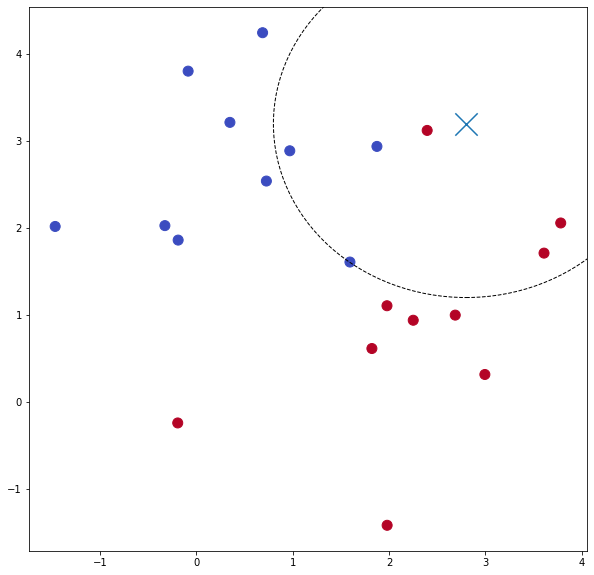

In [23]:
cmap = plt.cm.coolwarm
radius = 2
point = np.array([[2.8, 3.2]])
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.scatter(x[:,0], x[:,1], s= 100, c = y, cmap=cmap)
ax.scatter(point[:,0], point[:,1], s=500, marker='x')
ax.add_artist(plt.Circle((point[:,0], point[:,1]), radius=radius, fill=False, ls='--'))
clf = RadiusNeighborsClassifier(radius=radius, weights='distance')
clf.fit(x, y)

In [24]:
dist, ind = clf.radius_neighbors(point)
print(dist, ind)

[array([1.99634099, 0.96110936, 1.85607433, 1.50617586, 0.41075147,
       1.69425777])] [array([ 0,  1,  2,  8, 11, 18])]


(-0.1, 2)

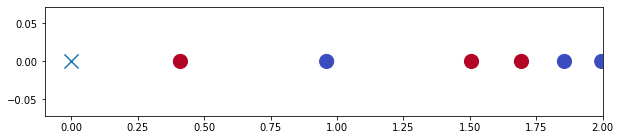

In [25]:
plt.figure(figsize=(10,2))
ax = plt.gca()
ax.scatter(dist[0], np.zeros(dist[0].shape), s = 200, c = y[ind[0]], cmap=cmap)
ax.scatter(0, 0, s = 200, marker='x', cmap=cmap)
# ax.scatter(0, 0, s = 100, cmap=cmap)
ax.set_xlim(-0.1, 2)

In [26]:
clf.predict(np.array([[2.8, 3]]))

array([1])

## Проблемы алгоритма и его ускорение

Очень быстро строится, но очень медленно делает предсказание.

- Сложность построения $O(1)$
- Сложность предсказания $O(nd)$

Варианты:
- Уменьшение d: уменьшение признакового пространства:

- Уменьшение n: сравнение не со всеми объектами тренировочной выборки:
    - взять некоторое количество $m$ объектов, которое во много раз меньше $n$. $-> O(md)$
    - KD деревья: с меньшим количеством данных, для действительные значения. $-> O(d \log n)$, когда $d << n$
    - inverted list для категориальных признаков:
    - fingerprinting.

## Выводы
Плюсы:
- Гладкая граница разделяющая классы.
- Предположение о классе строится только на функции расстояния.
- "Взял данные и классификатор готов" - почти моментальное построение.
- Нечего изменять - только $k$ и расстояние.
- Легко обновлять классификатор простым добавлением данных

Минусы:
- Необходимо вручную вводить недостающие данные.
- Чувствителен к выбросам.
- Чувствителен к большим значениям атрибутов.
- Высокие вычислительные затраты:
    - Необходимо хранить все данные.
    - Время классификации. Необходимо рассчитывать расстояние до всех объектов $O(nd)$
    Соответственно с ростом n классификатор становится медленнее.
    - Вычисление на классификации, а не на построении классификации.